In [1]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:

# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\HP\Desktop\Challenges\Telcom\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
# Handle missing values
df.dropna()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
11,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
20,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
68,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,T72937C,...,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0
78,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082018e+14,3.366917e+10,3.566261e+13,L41432B,...,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0
84,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082014e+14,3.366555e+10,8.637690e+13,T85779A,...,69288.0,19177045.0,10783199.0,8000048.0,496879416.0,1530545.0,247233250.0,1175435.0,33314765.0,519351173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149935,1.304243e+19,4/29/2019 7:28,312.0,4/30/2019 7:28,218.0,86399.0,2.082014e+14,3.366396e+10,8.637690e+13,T29891A,...,6610042.0,984596.0,18826490.0,6017956.0,395964234.0,4501221.0,771516975.0,3904640.0,19307884.0,432074290.0
149951,1.304243e+19,4/29/2019 7:28,728.0,4/30/2019 7:28,643.0,86399.0,2.082014e+14,3.366513e+10,8.637690e+13,T73896C,...,267363.0,10381499.0,22890549.0,14878522.0,102822680.0,2732534.0,666772734.0,10601725.0,42336374.0,132103771.0
149968,1.304243e+19,4/29/2019 7:28,131.0,4/30/2019 7:08,257.0,85215.0,2.082014e+14,3.365069e+10,3.536981e+13,L53329B,...,5116849.0,21068795.0,22559018.0,15263948.0,657274584.0,3569715.0,66680072.0,3552410.0,44241775.0,694842183.0
149973,7.277826e+18,4/29/2019 7:28,548.0,4/30/2019 7:28,451.0,86399.0,2.082010e+14,3.366856e+10,8.654080e+13,T73780B,...,7347338.0,1585640.0,18726138.0,16090030.0,308033327.0,11458772.0,278137326.0,14543296.0,46934446.0,349067954.0


In [9]:
# Outlier treatment
for col in ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [12]:
# Aggregation per user
user_data = df.groupby('Bearer Id').agg(
    total_duration=('Dur. (ms)', 'sum'),
    total_DL=('Total DL (Bytes)', 'sum'),
    total_UL=('Total UL (Bytes)', 'sum')
   
).reset_index()

In [16]:
# Basic metrics
print(user_data[['total_duration', 'total_DL', 'total_UL']].describe())


       total_duration      total_DL      total_UL
count    1.347080e+05  1.347080e+05  1.347080e+05
mean     1.105114e+05  5.029635e+08  4.548836e+07
std      7.463891e+04  3.105105e+08  1.978044e+07
min      7.142000e+03  8.827082e+06  9.503668e+06
25%      6.008050e+04  2.614752e+08  3.407356e+07
50%      8.640000e+04  4.877182e+08  4.252780e+07
75%      1.530890e+05  7.064602e+08  5.177070e+07
max      2.132119e+06  6.288470e+09  7.021455e+08


In [17]:
# Dispersion parameters
dispersion = user_data[['total_duration', 'total_DL', 'total_UL']].std()


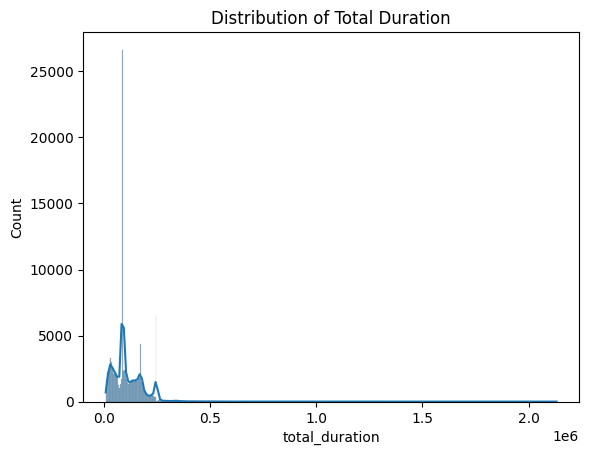

In [18]:
# Univariate analysis
sns.histplot(user_data['total_duration'], kde=True)
plt.title('Distribution of Total Duration')
plt.show()


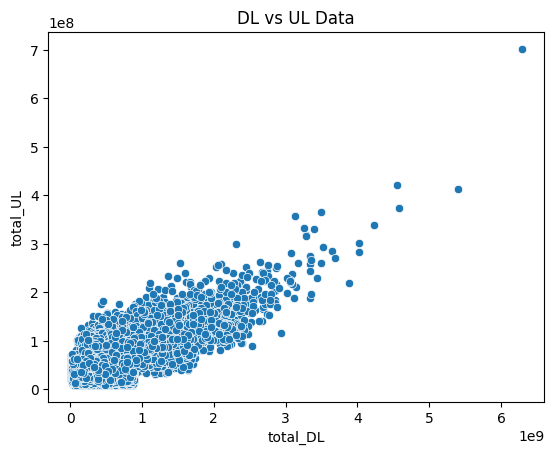

In [19]:
# Bivariate analysis
sns.scatterplot(x='total_DL', y='total_UL', data=user_data)
plt.title('DL vs UL Data')
plt.show()


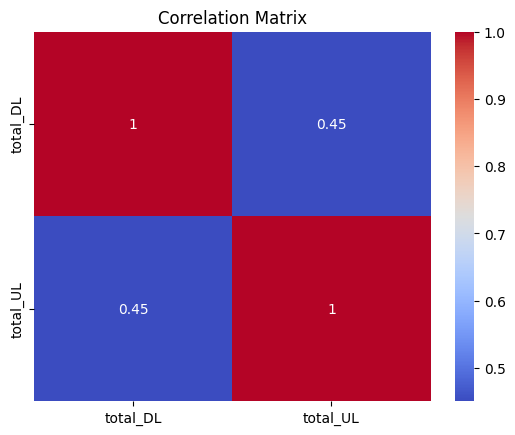

In [21]:
# Correlation matrix
corr_matrix = user_data[['total_DL', 'total_UL']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:
# PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data[['total_DL', 'total_UL']])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [24]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.72518696 0.27481304]


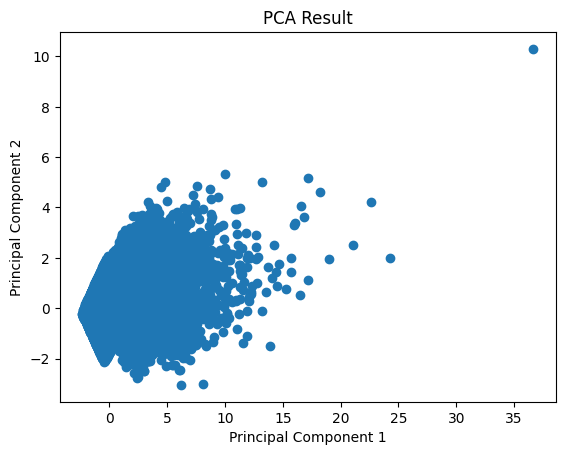

In [25]:
# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()